# Q1

<div dir='rtl'>
    ابتدا توابع کتابخانه‌ای مورد نیاز را
    import 
    می‌کنیم و تصاویر را می‌خوانیم.
</div>

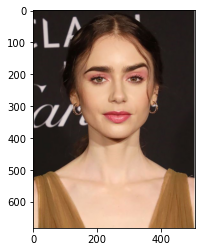

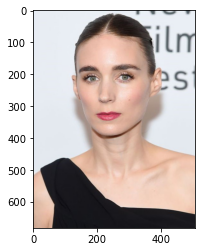

((682, 508, 3), (682, 508, 3))

In [1]:
# import libraries and read images
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('res01.jpg') 
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1);
plt.show()

img2 = cv2.imread('res02.jpg') 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2);
plt.show()

img1.shape, img2.shape

<div dir='rtl'>
    همانطور که ملاحظه کردید سایز تصاویر یکسان است. این سایز را قبلا تنظیم کردم تا یکی شود. حال برای به دست آوردن نقاط مانند تمرین سری قبلی از یک 
    mouse event
    استفاده می‌کنیم.
    این تابع به این صورت عمل می‌کند که هر بار کلیک چپ می‌کنیم یک نقطه به لیست نقاط اضافه می‌شود، این نقطه روی تصویر به همراه شماره‌اش قرار می‌گیرد و تصویر دوباره نمایش داده می‌شود.
    همچنین می‌توانید برای 
    undo
    کردن نقطه داده شده از کلیک راست استفاده کنید که یک اندیس عقبتر از آرایه نقطه‌ها می‌رود و پس از آن دوباره نقطه مد نظر خود را انتخاب کنید.
    توجه کنید که باید ترتیب نقاط مشخص شده در تصویر اول با ترتیب نقاط مشخص شده در تصویر دوم یکی باشد.
</div>

In [4]:
# checking for mouse clicks
def click_event(event, x, y, flags, params):
    global points, img, copies
    
    # detect a click on the border
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append([y, x])
        copies.append(np.copy(img))
        cv2.circle(img, (x, y), 2, (100, 100, 100), thickness=-1)
        cv2.putText(img, str(len(points)), (x + 3, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (100, 100, 100), 1, cv2.LINE_AA)
        cv2.imshow('Click on the border', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    
    # for undo :D
    if event == cv2.EVENT_RBUTTONDOWN:
        img = copies[-1]
        copies = copies[:-1]
        points = points[:-1]
        cv2.imshow('Click on the border', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

<div dir='rtl'>
    حال با استفاده از تابع تعریف شده در مرحله قبل، نقاط تصویر اول را انتخاب می‌کنیم.
</div>

In [61]:
# define variables for mouse event
img = np.copy(img1)
points = list(points1)
copies = []

In [62]:
# call the click_event function for selecting the points
cv2.imshow('Click on the border', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
cv2.setMouseCallback('Click on the border', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

<div dir='rtl'>
    این نقاط را در فایل 
    points1.txt
    ذخیره می‌کنیم تا بعدا دوباره استفاده کنیم.
</div>

In [63]:
# write the position of the points in file points1.txt
points1 = list(points)
with open('points1.txt', 'w') as points_file1:
    for point in points1:
        points_file1.write(str(point[0]) + ' ' + str(point[1]) + '\n')

<div dir='rtl'>
    این بخش برای چک کردن درستی نوشته شدن نقاط روی تصویر اول است. صرفا تصویر اول را به همراه نقاط آن در فایل 
    img1_with_points.jpg
    سیو می‌کند.
</div>

In [214]:
# save the image with points
img = np.copy(img1)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

for i in range(len(points1)):
    point = points1[i]
    cv2.circle(img, (point[1], point[0]), 1, (200, 200, 0), thickness=-1)
    cv2.putText(img, str(i + 1), (point[1] + 3, point[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.25, (200, 200, 0), 1, cv2.LINE_AA)

cv2.imwrite("img1_with_points.jpg", img)

True

<div dir='rtl'>
    مشابه تصویر اول، همان کارهای قبلی را روی تصویر دوم اجرا می‌کنیم.
</div>

In [181]:
# define variables for mouse event
img = np.copy(img2)
points = list(points2)
copies = []

In [82]:
# call the click_event function for selecting the points
cv2.imshow('Click on the border', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
cv2.setMouseCallback('Click on the border', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [83]:
# write the position of the points in file points1.txt
points2 = list(points)
with open('points2.txt', 'w') as points_file2:
    for point in points2:
        points_file2.write(str(point[0]) + ' ' + str(point[1]) + '\n')

In [224]:
# save the image with points
img = np.copy(img2)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

for i in range(len(points2)):
    point = points2[i]
    cv2.circle(img, (point[1], point[0]), 1, (200, 200, 0), thickness=-1)
    cv2.putText(img, str(i + 1), (point[1] + 3, point[0]), cv2.FONT_HERSHEY_SIMPLEX, 0.25, (200, 200, 0), 1, cv2.LINE_AA)

cv2.imwrite("img2_with_points.jpg", img)

True

<div dir='rtl'>
    کد این بخش برای این زده شده که دیگر نیازی نباشد هر بار نقاط را انتخاب کنیم. لذا تعداد زیادی از کدهای بالا را در فایل
    q1.py
    کامنت می‌کنم که برنامه را راحت‌تر بتوانید ران کنید.
    به طور کلی کاری که در این قسمت انجام می‌شود خواندن مختصات نقاط از روی فایل‌ها و نمایش تصاویر به همراه نقاط است.
</div>

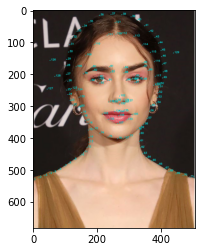

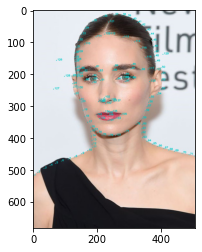

In [225]:
# read the position of the points from files
points1 = []
with open('points1.txt', 'r') as points_file1:
    lines = points_file1.readlines()
    for line in lines:
        points1.append(list(map(int, line.split())))

points2 = []
with open('points2.txt', 'r') as points_file2:
    lines = points_file2.readlines()
    for line in lines:
        points2.append(list(map(int, line.split())))

img = cv2.imread('img1_with_points.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);
plt.show()

img = cv2.imread('img2_with_points.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);
plt.show()

<div dir='rtl'>
    تعدادی نقطه در وسط و کناره‌های تصویر در نظر می‌گیریم که در مثلث بندی و بهتر کردن نتیجه به ما کمک کند. این نقاط در فایل‌های ذکر شده در قسمت‌های قبل نیامده‌اند. علت این است که قصد نداشتم مختصات آن‌ها به اشتباه تغییر کند و این‌ها را جدا اضافه کردم.
</div>

In [226]:
# add corners to the points
points1.append([0, img.shape[1]//2])
points1.append([img.shape[0] - 1, img.shape[1]//2])
points1.append([img.shape[0]//3, 0])
points1.append([img.shape[0]//3, img.shape[1] - 1])
points1.append([0, 0])
points1.append([img.shape[0] - 1, 0])
points1.append([0, img.shape[1] - 1])
points1.append([img.shape[0] - 1, img.shape[1] - 1])

points2.append([0, img.shape[1]//2])
points2.append([img.shape[0] - 1, img.shape[1]//2])
points2.append([img.shape[0]//3, 0])
points2.append([img.shape[0]//3, img.shape[1] - 1])
points2.append([0, 0])
points2.append([img.shape[0] - 1, 0])
points2.append([0, img.shape[1] - 1])
points2.append([img.shape[0] - 1, img.shape[1] - 1])

<div dir='rtl'>
    در این قسمت می‌خواهیم با استفاده از تابع 
    cv2.Subdiv2D
    مثلث‌بندی را انجام دهیم.
    این تابع از روش
    Delaunay
    استفاده می‌کند. طریقه کار کردن با آن به این صورت است که ابتدا نقاط را به آن اضافه کرده و سپس از آن مثلث‌ها را درخواست می‌کنیم که هر یک از مثلث‌ها دارای ۶ تا عدد هستند که هر دو تا عدد مختصات یک نقطه را نشان می‌دهد.
</div>

In [227]:
# calculate the triangles of the first image
rect = (0, 0, img.shape[0], img.shape[1])
subdiv = cv2.Subdiv2D(rect);
for p in points1:
    subdiv.insert((p[0], p[1]))
triangles1 = subdiv.getTriangleList()

<div dir='rtl'>
    در این قسمت مثلث‌بندی‌ها را روی تصویر نمایش داده و آن را ذخیره می‌کنیم.
</div>

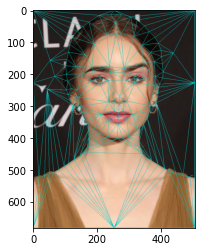

True

In [228]:
# show the triangles with line
img = np.copy(img1)
for t in triangles1:
    t = np.array(t, dtype=np.int64)
    cv2.line(img, (t[1], t[0]), (t[3], t[2]), (0, 200, 200), thickness=1)
    cv2.line(img, (t[1], t[0]), (t[5], t[4]), (0, 200, 200), thickness=1)
    cv2.line(img, (t[3], t[2]), (t[5], t[4]), (0, 200, 200), thickness=1)
plt.imshow(img)
plt.show()

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite("img1_with_lines.jpg", img)

<div dir='rtl'>
    چون هر عضو آرایه مثلث‌ها ۶ عدد دارد و مختصات هر نقطه به طور جداگانه مشخص نشده، کد این قسمت زده شده تا مختصات نقاط مشخص‌تر باشد.
</div>

In [229]:
# arrange the triangle points
def arrange_triangle_points(points):
    return np.array([[points[0], points[1]],
                    [points[2], points[3]],
                    [points[4], points[5]]])

arranged_triangles1 = []
for i in range(len(triangles1)):
    arranged_triangles1.append(arrange_triangle_points(triangles1[i]))
triangles1 = np.array(arranged_triangles1, np.int32)

<div dir='rtl'>
    برای بهبود عملکرد و راحتی کار، همان مثلث‌بندی‌های به دست آمده برای تصویر اول را روی تصویر دوم نیز در نظر گرفته‌ام.
    در واقع این قسمت به این صورت عمل می‌کند که نقاط تصویر دوم را با تصویر اول متناظر می‌کند و نقاطی که با هم در تصویر اول تشکیل یک مثلث داده‌اند، در این قسمت نقاط متناظرشان تشکیل یک مثلث خواهند داد.
</div>

In [230]:
# get the triangles of the second image
points1, points2 = np.array(points1), np.array(points2)
triangles2 = []
for i in range(len(triangles1)):
    t = triangles1[i]
    idx0 = np.where(np.sum(points1 == t[0], axis=1) == 2)[0][0]
    idx1 = np.where(np.sum(points1 == t[1], axis=1) == 2)[0][0]
    idx2 = np.where(np.sum(points1 == t[2], axis=1) == 2)[0][0]
    triangles2.append(np.array([points2[idx0], points2[idx1], points2[idx2]]))
triangles2 = np.array(triangles2, dtype=np.int32)

<div dir='rtl'>
    نمایش مثلث‌بندی‌ها در تصویر دوم:
</div>

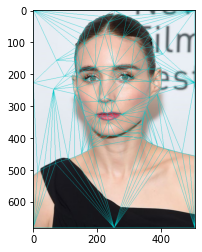

True

In [231]:
# show the triangles with line
img = np.copy(img2)
for t in triangles2:
    cv2.line(img, (t[0][1], t[0][0]), (t[1][1], t[1][0]), (0, 200, 200), thickness=1)
    cv2.line(img, (t[0][1], t[0][0]), (t[2][1], t[2][0]), (0, 200, 200), thickness=1)
    cv2.line(img, (t[1][1], t[1][0]), (t[2][1], t[2][0]), (0, 200, 200), thickness=1)
plt.imshow(img)
plt.show()
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite("img2_with_lines.jpg", img)

<div dir='rtl'>
    قسمت اصلی کد در این بخش آمده. عملکرد این قسمت مشابه توضیحات سر کلاس است. در هر مرحله میانگین نقاط مثلث‌بندی‌ها در دو تصویر صورت می‌گیرد و یک مثلث‌بندی جدید حاصل می‌شود. پس از آن مثلث‌های دو تصویر را به این مثلث‌بندی جدید
    warp
    می‌کنیم تا پس از آن بتوانیم میانگین این دو را بگیریم و تصویر جدید حاصل شود.
    warp
    کردن به این صورت عمل می‌کند که ابتدا مختصات مستطیل‌های محیط بر هر مثلث به دست می‌آید،
    پس از آن مختصات مثلث‌های 
    source
    و
    target
    به مبدأ مختصات برده می‌شود تا تبدیل آفین به دست بیاید. یک
    mask
    هم در نظر گرفته می‌شود که این 
    mask
    در نقاط داخل مثلث مقدار ۱ دارد و در خارج از آن مقدار ۰.
    سپس عمل وارپ انجام می‌گیرد. برای این کار از دو تابع 
    getAffineTransform()
    و
    warpAffine()
    استفاده کردم.
    تصویر داخل مستطیل محیط بر مثلث وارپ شده سپس
    mask
    روی آن اعمال می‌شود و مثلث با مقادیر تصویر
    source
    به عنوان خروجی داده می‌شود.
    البته تصویر خروجی این تابع
    warp
    همسایز با تصویر اصلی است و همه جا صفر است به جز جایی که مثلث وجود دارد.
    امیدوارم خوب توضیح داده باشم.
    پس از آن که مثلث‌های جدید به دست آمدند، میانگین‌گیری صورت گرفته و تصاویر ذخیره می‌شوند.
</div>

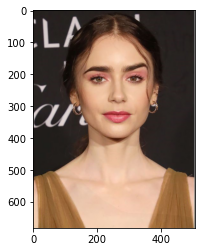

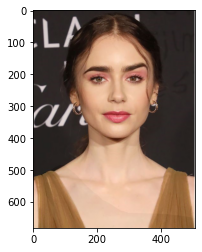

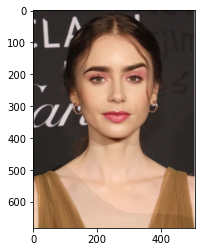

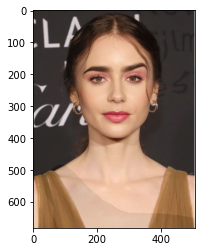

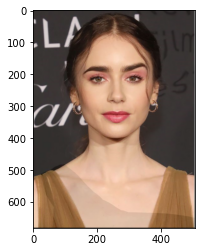

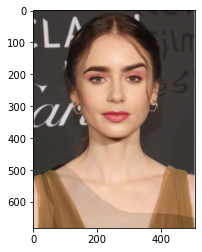

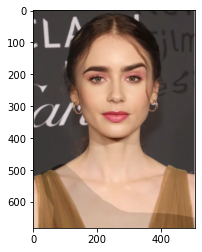

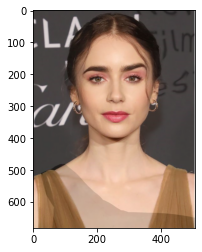

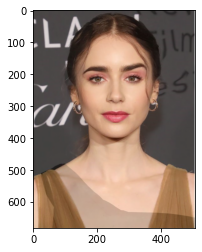

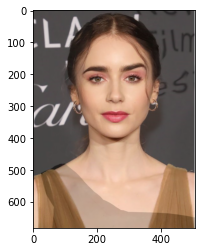

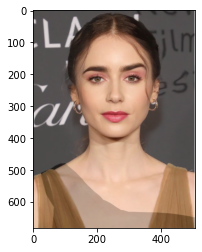

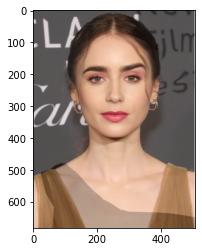

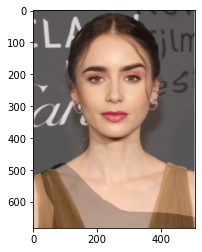

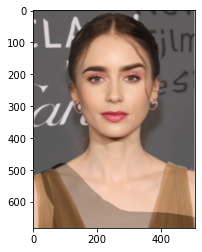

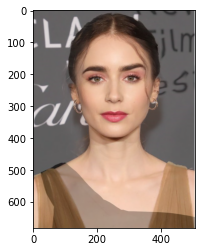

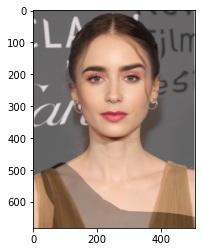

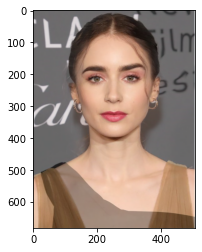

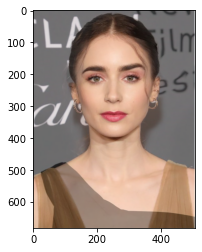

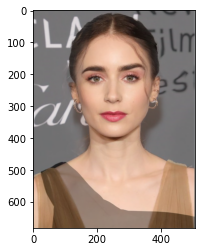

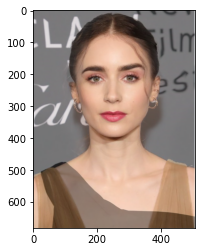

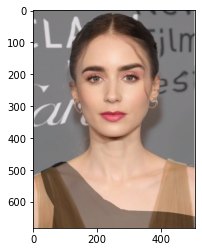

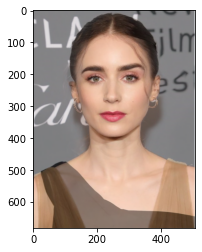

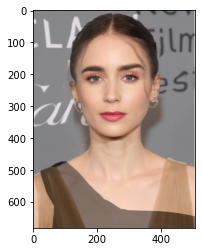

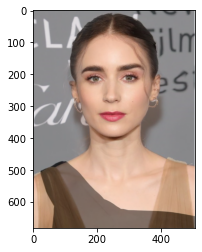

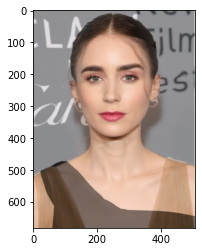

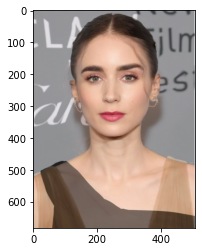

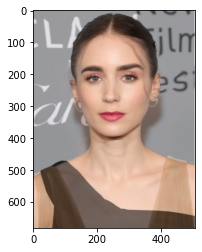

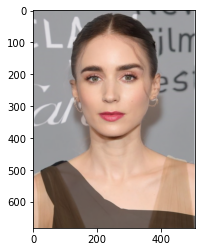

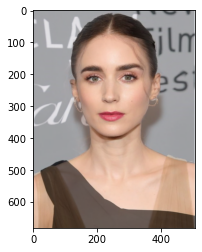

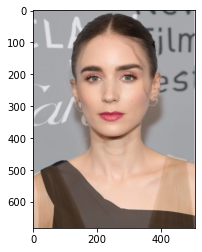

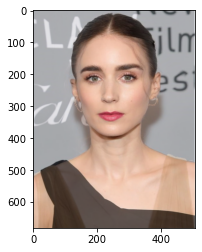

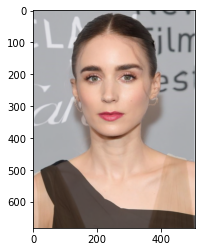

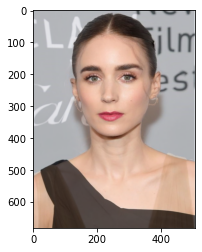

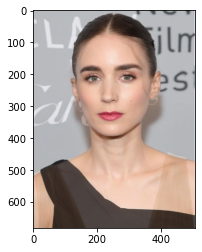

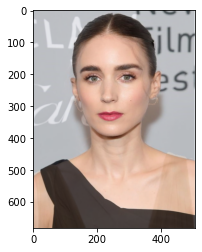

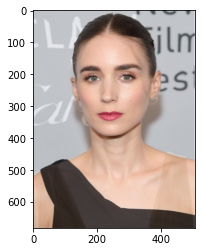

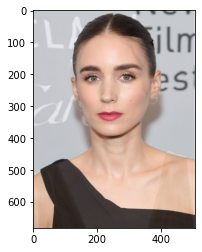

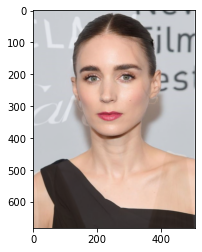

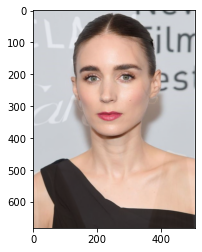

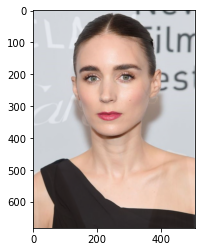

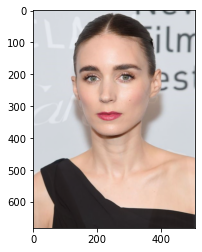

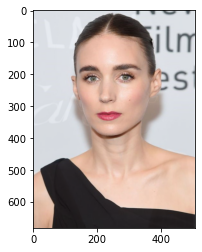

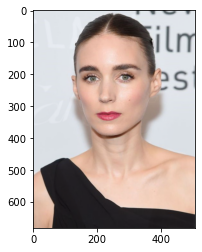

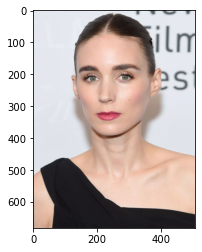

True

In [232]:
# get peripheral rectangle
def get_rectangle(triangle):
    min_y, max_y = np.min(triangle[:, 0]), np.max(triangle[:, 0])
    min_x, max_x = np.min(triangle[:, 1]), np.max(triangle[:, 1]) 
    return min_y, min_x, max_y - min_y + 1, max_x - min_x + 1


# warp the triangle of the source to destination with same size as the main image
def warp(img, triangle1, triangle2):
    img = np.array(img, dtype=np.uint8)
    rectangle1, rectangle2 = get_rectangle(triangle1), get_rectangle(triangle2)
    crop1, crop2 = [], []
    
    for _ in range(3):
        crop1.append(((triangle1[_][1] - rectangle1[1]), (triangle1[_][0] - rectangle1[0])))
        crop2.append(((triangle2[_][1] - rectangle2[1]), (triangle2[_][0] - rectangle2[0])))
        
    crop_img = img[rectangle1[0]:rectangle1[0]+rectangle1[2], rectangle1[1]:rectangle1[1]+rectangle1[3]]
    mask = np.zeros((rectangle2[2], rectangle2[3], 3), dtype=np.uint8)
    cv2.fillConvexPoly(mask, np.array(crop2, dtype=np.int32), (1, 1, 1));
    
    new_img = np.zeros(img.shape, dtype=np.uint8)
    y0, y1, x0, x1 = rectangle2[0], rectangle2[0]+rectangle2[2], rectangle2[1], rectangle2[1]+rectangle2[3]
    transform = cv2.getAffineTransform(np.array(crop1, dtype=np.float32), np.array(crop2, dtype=np.float32))
    new_img[y0:y1, x0:x1] = cv2.warpAffine(crop_img, transform, (rectangle2[3], rectangle2[2]), 
                                           None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101) * mask
    return new_img


save = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
cv2.imwrite('im0.jpg', save)
cv2.imwrite('im90.jpg', save)


# get the weighted average of the triangle points,
# warp the source triangle to destination,
# and get the weighted average of the inside of the triangles in each frame 
for i in range(1, 45):
    mid_img = np.zeros(img.shape, dtype=np.uint8)
    mid_triangles = ((1.0 - i / 45) * triangles1 + (i / 45) * triangles2).astype(np.int32)
    for j in range(len(triangles1)):
        warp_img1 = warp(img1, triangles1[j], mid_triangles[j])
        warp_img2 = warp(img2, triangles2[j], mid_triangles[j])
        add = np.round((1.0 - i / 45) * warp_img1 + (i / 45) * warp_img2).astype(np.uint8)
        mid_img = np.where(mid_img==0, add, mid_img)
    plt.imshow(mid_img)
    plt.show()
    save = cv2.cvtColor(mid_img, cv2.COLOR_RGB2BGR)
    cv2.imwrite('im' + str(i) + '.jpg', save)
    cv2.imwrite('im' + str(90 - i) + '.jpg', save)
    if i == 15:
        cv2.imwrite('res03.jpg', save)
    if i == 30:
        cv2.imwrite('res04.jpg', save)
        
save = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)
cv2.imwrite('im45.jpg', save)

<div dir='rtl'>
    توجه کنید که پس از اجرا شدن برنامه باید با استفاده از
    cmd
    و نوشتن دستور
    "ffmpeg -framerate 30 -i im%d.jpg morph.mp4"
    ویدیوی خواسته شده در مسئله را بسازید.
    <br>
    فایل‌های خواسته نشده در مسئله مانند
    points1.txt
    و
    points2.txt
    و
    تصاویر میانی
    و همچنین تصاویر به همراه نقاط و خط‌ها در پوشه
    Complementary Files
    قرار دارند.
    توجه کنید که اگر قصد استفاده از فایل‌های موجود در این فولدر را دارید باید آدرس‌ها آپدیت شوند.
    <br>
    <b>
    توضیحات تکمیلی:
    </b>
    چون تصویر دوم مقدار موهای خیلی کمتری دارد، مجبور شدم که بخشی از موهای تصویر اول را با بک گراند یکی در نظر بگیرم که خروجی نهایی بد نشود.
    با این حال نزدیکی گوش مقداری نادقیق است. علت آن است که فرم گوش این دو بازیگر بسیار متفاوت است و نمی‌توان بهتر از این برنامه را بهبود داد.
    همچنین چون لباس‌ها را نمی‌شد بر هم منطبق کرد کمی حالت مصنوعی‌تری دارند. با این حال تصویر چهره بسیار خوب درآمده!
</div>

# Q2

<div dir='rtl'>
    ابتدا توابع کتابخانه‌ای مورد نیاز را
    import 
    می‌کنیم و تصاویر را به همراه 
    mask
    می‌خوانیم.
    در صورت سوال
    mask
    به عنوان خروجی خواسته نشده. همچنین از شما پرسیدم که اگر این
    mask
    آماده باشد مشکلی دارد یا نه و گفتید مشکلی ندارد. لذا من از
    mask
    که با استفاده از برنامه فتوشاپ به دست آوردم استفاده می‌کنم.
    این فایل را در پوشه
    Complementary Files
    قرار می‌دهم.
    توجه کنید که اگر قصد استفاده از فایل‌های موجود در این فولدر را دارید باید آدرس‌ها آپدیت شوند.
    همچنین چون این
    mask
    خیلی دقیق است با استفاده از 
    تابع
    dilate
    کمی آن را بزرگتر کردم تا اندکی نواحی اطراف آهو را بگیرد و با استفاده از 
    mask
    بلور شده در جنگل طبیعی‌تر جلوه کند.
</div>

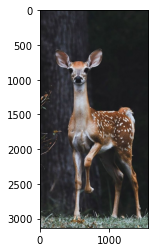

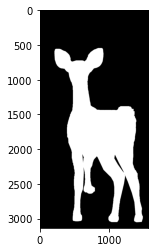

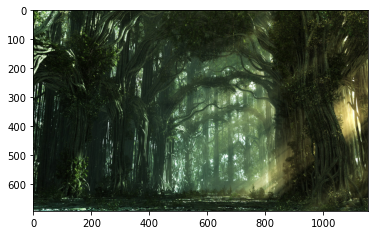

In [40]:
# import libraries and read images
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve

deer = cv2.imread('res05.jpg') 
deer = cv2.cvtColor(deer, cv2.COLOR_BGR2RGB)
plt.imshow(deer)
plt.show();

mask = cv2.imread('mask.jpg', cv2.IMREAD_GRAYSCALE) 
kernel = np.ones((10,10), np.uint8)
mask = cv2.dilate(mask, kernel, iterations=3)
plt.imshow(mask, cmap='gray')
plt.show();

jungle = cv2.imread('res06.jpg') 
jungle = cv2.cvtColor(jungle, cv2.COLOR_BGR2RGB)
plt.imshow(jungle)
plt.show();

<div dir='rtl'>
    حال مطابق توضیحات کلاس برای طبیعی‌تر کردن آهو در جنگل
    mask
    را کمی
    blur
    و تار می‌کنم.
    این کار را با فیلتر گاوسی و سیگمای 
    ۵
    انجام دادم.
</div>

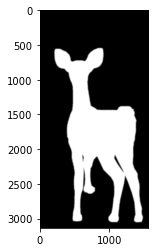

In [41]:
# blur image using gaussian filter
def blur(img):
    sigma = 5
    shape = 2 * 3 *  sigma + 1
    gauss_filter_x = np.array([np.exp(-(i - shape//2)**2 / (2 * sigma**2)) for i in range(shape)])
    gauss_filter_x = gauss_filter_x / sum(gauss_filter_x)
    gauss_filter_x = gauss_filter_x.reshape((1, shape))
    gauss_filter_y = gauss_filter_x.reshape((shape, 1))
    blurred_img = cv2.filter2D(img, -1, gauss_filter_x)
    blurred_img = cv2.filter2D(blurred_img, -1, gauss_filter_y)
    return blurred_img

blurred_mask = blur(mask)
plt.imshow(blurred_mask, cmap='gray')
cv2.imwrite('blurred_mask.jpg', blurred_mask)
plt.show();

<div dir='rtl'>
    سایز تصویر آهو خیلی بزرگ‌تر از جنگل است. لذا آن و 
    mask
    و
    مسک
    blur
    شده را ریسایز می‌کنم تا کوچک‌تر شوند.
</div>

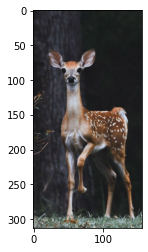

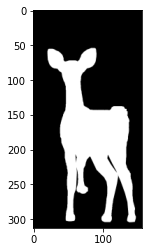

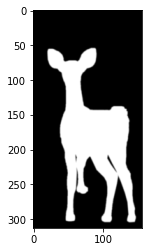

In [42]:
# a function to resize the image
def resize(img, scale):
    dim = (int(img.shape[1] * scale), int(img.shape[0] * scale))
    return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

resized_deer = resize(deer, 0.1)
plt.imshow(resized_deer)
plt.show()

resized_mask = resize(mask, 0.1)
plt.imshow(resized_mask, cmap='gray')
plt.show()

resized_blurred_mask = resize(blurred_mask, 0.1)
plt.imshow(resized_blurred_mask, cmap='gray')
plt.show()

<div dir='rtl'>
    حال تصویر آهو و مسک‌ها را در یک تصویر به سایز جنگل 
    می‌چسبانیم تا در ادامه از آن‌ها استفاده کنیم.
</div>

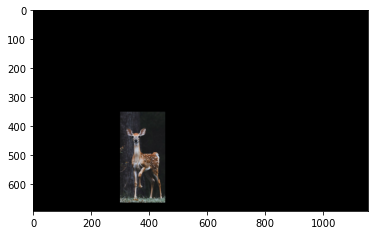

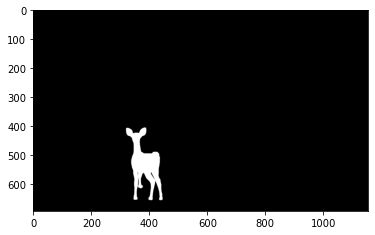

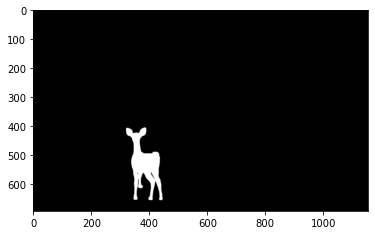

In [43]:
# paste the source image in a image with size of the target
source_img = np.zeros(jungle.shape, dtype=np.uint8)
source_img[350:350+resized_deer.shape[0], 300:300+resized_deer.shape[1]] = resized_deer
plt.imshow(source_img)
plt.show()

source_mask = np.zeros((jungle.shape[0],jungle.shape[1]), dtype=np.uint8)
source_mask[350:350+resized_mask.shape[0], 300:300+resized_mask.shape[1]] = resized_mask
plt.imshow(source_mask, cmap='gray')
plt.show()

source_blurred_mask = np.zeros((jungle.shape[0],jungle.shape[1]), dtype=np.uint8)
source_blurred_mask[350:350+resized_blurred_mask.shape[0], 300:300+resized_blurred_mask.shape[1]] = resized_blurred_mask
plt.imshow(source_blurred_mask, cmap='gray')
plt.show()

<div dir='rtl'>
    لاپلاسین تصویر
    source
    یا آهو را برای قسمت سمت راست معادله صفحه
    ۲۸ 
    اسلاید 
    ۲۵
    به دست می‌آوریم.
</div>

In [45]:
# get laplacian of the source image
def laplacian(img):
    img = np.array(img, dtype=np.float64)
    _filter = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    filtered_img = cv2.filter2D(img, -1, _filter)
    return filtered_img

right_side = laplacian(source_img) 

<div dir='rtl'>
    مشابه اسلاید یک شماره‌گذاری روی نقاط داخل
    mask
    انجام می‌دهیم تا بعدا در حل معادله از آن استفاده کنیم.
    با توجه به این که ماتریس
    sparse
    است و این که حتی اگر 
    sparse
    نباشد سایز ماتریس
    $A$
    در معادله
    $Ax = b$
    بزرگ می‌شود و مسئله قابل حل نخواهد بود، باید این شماره‌گذاری را داشته باشیم تا بتوانیم یک 
    csr_matrix
    یا نسخه فشرده شده ماتریس
    sparse
    را به دست آوریم.
</div>

In [46]:
# get the indices inside the mask
idx_arr = np.zeros(source_mask.shape, dtype=np.int32)
maximum = source_mask.shape[0] * source_mask.shape[1]
num = 0
for i in range(source_mask.shape[0]):
    for j in range(source_mask.shape[1]):
        if source_mask[i][j] > 0:
            idx_arr[i][j] = num
            num += 1
        else:
            idx_arr[i][j] = maximum

<div dir='rtl'>
    حال سمت چپ معادله را به دست می‌آوریم.
    در نقاط روی مرز 
    mask
    باید همان نقاط
    target
    را در نظر بگیریم و در بقیه جاها مقدار لاپلاسین.
    معادلات به دست آمده کاملا مشابه معادلات صفحه
    ۲۸
    هستند.
    پس از تشکیل ماتریس
    A
    یا سمت چپ معادله از
    spsolve
    برای حل معادله استفاده می‌کنیم.
    معادله برای هر کانال باید به طور جداگانه حل شود.
</div>

In [47]:
# get the left side of the equtions and solve them
left_side = []
right_side1 = []
right_side2 = []
right_side3 = []
row = []
col = []
for i in range(jungle.shape[0]):
    for j in range(jungle.shape[1]):
        if idx_arr[i][j] != maximum and max(idx_arr[i - 1][j], idx_arr[i + 1][j], idx_arr[i][j - 1],
                                            idx_arr[i][j + 1]) != maximum:
            left_side.append(-1)
            left_side.append(-1)
            left_side.append(4)
            left_side.append(-1)
            left_side.append(-1)
            right_side1.append(right_side[i][j][0])
            right_side2.append(right_side[i][j][1])
            right_side3.append(right_side[i][j][2])
            for _ in range(5):
                row.append(idx_arr[i, j])
            col.append(idx_arr[i - 1, j])
            col.append(idx_arr[i + 1, j])
            col.append(idx_arr[i, j])
            col.append(idx_arr[i, j - 1])
            col.append(idx_arr[i, j + 1])
        elif idx_arr[i][j] != maximum:
            left_side.append(1)
            right_side1.append(jungle[i][j][0])
            right_side2.append(jungle[i][j][1])
            right_side3.append(jungle[i][j][2])
            row.append(idx_arr[i][j])
            col.append(idx_arr[i][j])
            
            
n = len(np.where(idx_arr != maximum)[0])
left_side = csr_matrix((left_side, (row, col)), shape=(n, n))

x = []

x.append(spsolve(left_side, right_side1))
x.append(spsolve(left_side, right_side2))
x.append(spsolve(left_side, right_side3))

<div dir='rtl'>
    حال باید با استفاده از جواب‌های به دست آمده در قسمت قبل، خروجی نهایی را به دست بیاوریم. به این صورت عمل می‌کنیم که با استفاده از 
    mask
    بلور شده جاهایی که به حاشیه نزدیک‌تر هستند هم مقداری از تصویر
    source
    را به خود می‌گیرند و هم مقداری از تصویر
    target
    را. به این صورت آهو در جنگل طبیعی‌تر خواهد بود.
    جاهایی که داخل
    mask
    نیست هم مقادیر جنگل را به خود می‌گیرد.
    حال چون جواب معادله در قسمت‌هایی
    overflow
    یا
    underflow
    می‌شود لازم است به مقادیر کمتر از صفر مقدار صفر و به مقادیر بیشتر از ۲۵۵ مقدار ۲۵۵ را بدهیم.
    پس از آن خروجی را ذخیره می‌کنیم.
    همانطور که مشاهده می‌کنید خروجی بسیار خوب است و آهو توانسته کمی رنگ سبز بک گراند را به خود بگیرد.
</div>

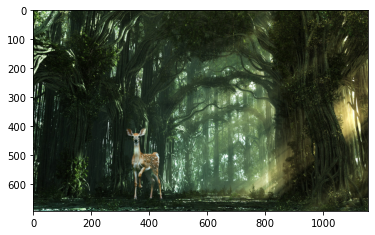

True

In [48]:
# get the final result
result = np.zeros(jungle.shape)
for c in range(3):
    for i in range(source_mask.shape[0]):
        for j in range(source_mask.shape[1]):
            if source_mask[i][j] > 0:
                result[i][j][c] = source_blurred_mask[i][j] / 255 * x[c][idx_arr[i][j]]
                result[i][j][c] += (1 - source_blurred_mask[i][j] / 255) * jungle[i][j][c]
            else:
                result[i][j][c] = jungle[i][j][c]

result = np.where(result > 255, 255, result)
result = np.where(result < 0, 0, result)
result = result.astype(np.uint8)
plt.imshow(result)
plt.show()

save = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
cv2.imwrite("res07.jpg", save)

# Q3

<div dir='rtl'>
    ابتدا توابع کتابخانه‌ای مورد نیاز را
    import 
    می‌کنیم و تصاویر را می‌خوانیم.
    قصد داریم با استفاده از پشته لاپلاسین یک تصویر به دست بیاوریم که سمت راست تصویر مشابه تصویر اول باشد و سمت چپ مشابه تصویر دوم. 
</div>

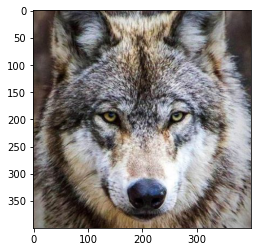

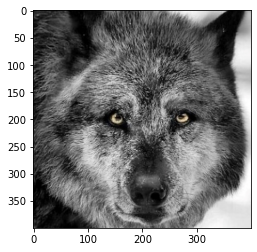

In [289]:
# import libraries and read images
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('res08.jpg') 
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show();

img2 = cv2.imread('res09.jpg') 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show();

<div dir='rtl'>
    در این قسمت پشته لاپلاسین را به دست می‌آوریم.
    تابع 
    blur
    مشابه قسمت قبل و با استفاده از فیلتر گاوسی پیاده‌سازی شده است.
    این کد به این صورت عمل می‌کند که اگر پشته تصاویر
    blur
    شده را را در نظر بگیریم
    blur[i]
    و
    blur[i - 1]
    را در نظر گرفته از هم کم می‌کند و لاپلاسین به دست می‌آید.
    این مقادیر را در پشته ذخیره می‌کنیم.
    تصاویر اول پشته جزئیات بیشتری را دارند. همچنین آخرین تصویری که در پشته قرار می‌گیرد، تصویر
    blur
    شده در آن مرحله است.
</div>

level 0:


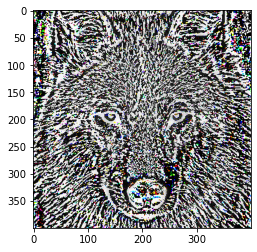

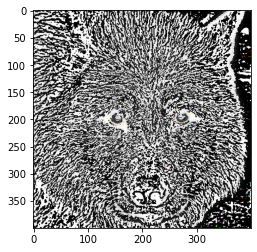

level 1:


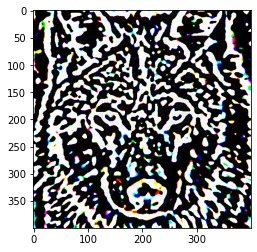

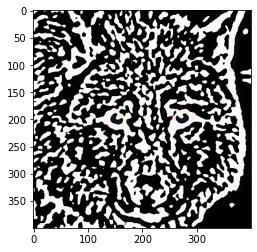

level 2:


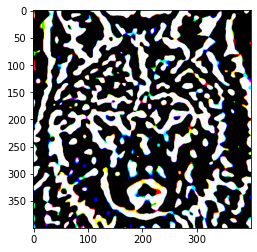

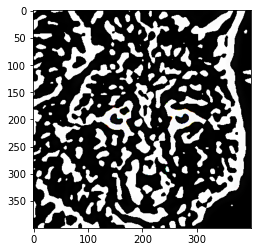

level 3:


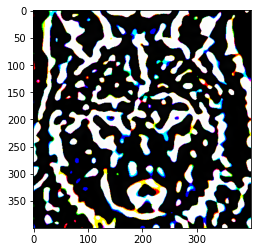

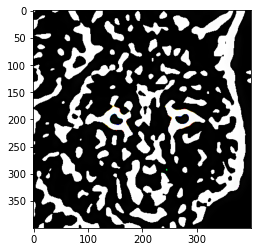

level 4:


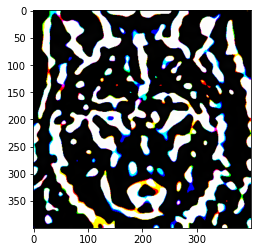

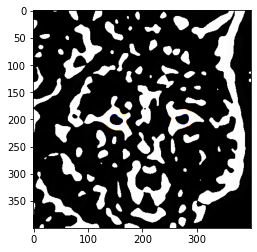

level 5:


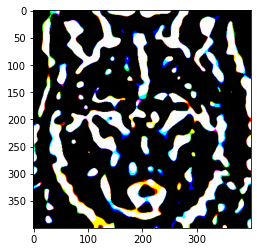

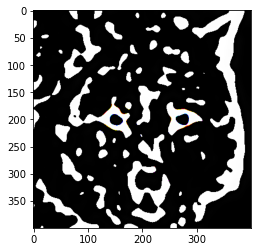

level 6:


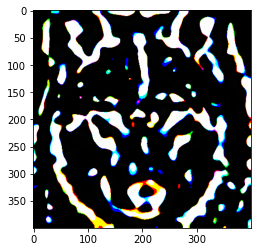

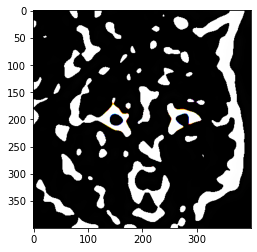

level 7:


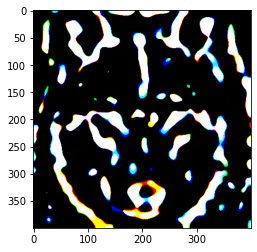

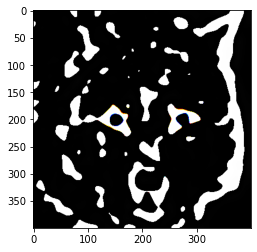

level 8:


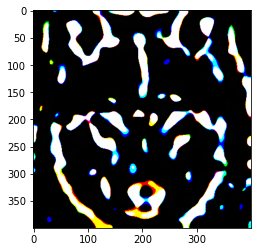

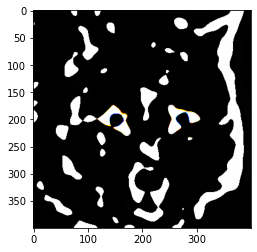

level 9:


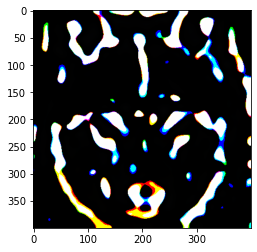

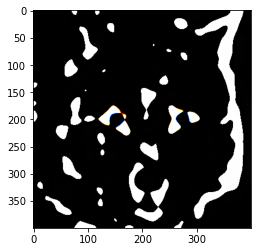

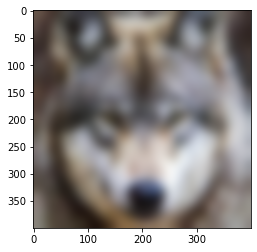

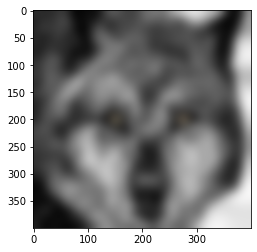

In [290]:
# blur image using gaussian filter
def blur(img):
    img = np.float64(img)
    sigma = 3
    shape = 2 * 3 *  sigma + 1
    gauss_filter_x = np.array([np.exp(-(i - shape//2)**2 / (2 * sigma**2)) for i in range(shape)])
    gauss_filter_x = gauss_filter_x / sum(gauss_filter_x)
    gauss_filter_x = gauss_filter_x.reshape((1, shape))
    gauss_filter_y = gauss_filter_x.reshape((shape, 1))
    blurred_img = cv2.filter2D(img, -1, gauss_filter_x)
    blurred_img = cv2.filter2D(blurred_img, -1, gauss_filter_y)
    return blurred_img


# calculate the laplacian stack
pre1 = img1.astype(np.float64)
pre2 = img2.astype(np.float64)
laplaces1 = []
laplaces2 = []
for i in range(10):
    blur1 = blur(pre1)
    laplaces1.append(pre1 - blur1)
    blur2 = blur(pre2)
    laplaces2.append(pre2 - blur2)
    pre1, pre2 = blur1, blur2
    print('level ' + str(i) + ':')
    plt.imshow(laplaces1[-1].astype(np.uint8))
    plt.show()
    plt.imshow(laplaces2[-1].astype(np.uint8))
    plt.show()
    
laplaces1.append(blur1)
laplaces2.append(blur2)
plt.imshow(laplaces1[-1].astype(np.uint8))
plt.show()
plt.imshow(laplaces2[-1].astype(np.uint8))
plt.show()

<div dir='rtl'>
    ترتیب پشته را معکوس می‌کنیم. چون می‌خواهیم اول اطلاعات کلی‌تر را مرج کنیم.
    حال در این قسمت
    feathering
    را انجام می‌دهیم.
    در هر مرحله یک 
    mask
    به دست می‌آوریم.
    این مسک تصویر را به دو نیمه تقسیم می‌کند و در مراحل اولیه فیلتر گاوسی که برای 
    blur
    شدن رو آن اعمال می‌شود سیگمای بزرگی دارد
    $1.5^{13}$
    و به تدریج این سیگما با ضریب 1.1 کم می‌شود.
    توجه کنید که در این قسمت
    blur
    تنها در راستای افقی انجام می‌شود.
    سپس تصویر اول و دوم با استفاده از این مسک ادغام می‌شوند و با تصویر در مرحله قبلی جمع می‌شوند. تصویر خروجی در ابتدا مقدار صفر دارد سپس با مقادیر کلی‌تر از دو تصویر پر شده و به تدریج جزییات دقیق‌تر می‌شوند.
    همچنین چون ممکن است مقادیر تصویر در برخی جاها از ۲۵۵ بیشتر یا از ۰ کمتر شوند لازم است مقدار مینیمم و ماکسیمم آن‌ها را با ۰ و ۲۵۵ ست کنیم.
    تصویر مرج شده را می‌بینید که بسیار طبیعی شده است.
</div>

In [291]:
# reverse the laplacian order
laplaces1 = laplaces1[::-1]
laplaces2 = laplaces2[::-1]

level 0 with sigma=194:


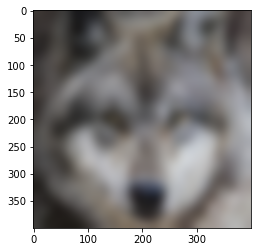

level 1 with sigma=176:


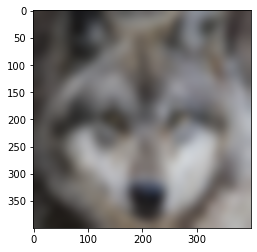

level 2 with sigma=160:


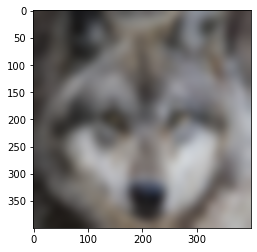

level 3 with sigma=145:


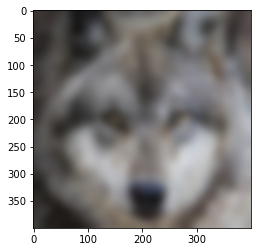

level 4 with sigma=132:


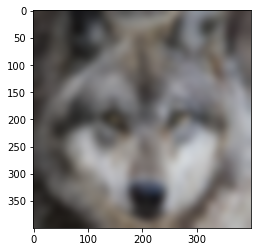

level 5 with sigma=120:


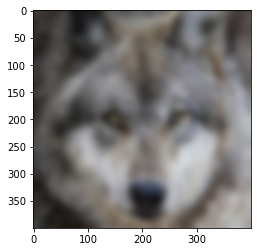

level 6 with sigma=109:


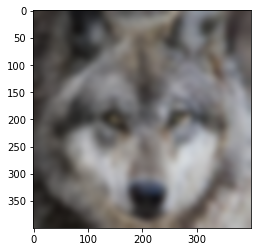

level 7 with sigma=99:


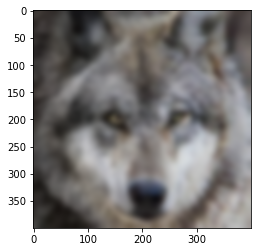

level 8 with sigma=90:


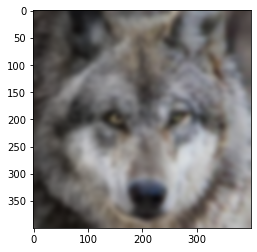

level 9 with sigma=82:


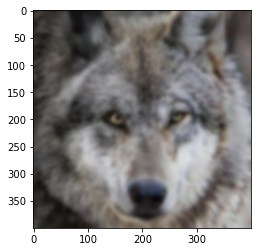

level 10 with sigma=74:


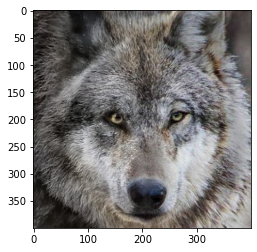

True

In [292]:
# blur image using gaussian filter
def blur_x(img, sigma):
    shape = 2 * 3 *  sigma + 1
    gauss_filter_x = np.array([np.exp(-(i - shape//2)**2 / (2 * sigma**2)) for i in range(shape)])
    gauss_filter_x = gauss_filter_x / sum(gauss_filter_x)
    gauss_filter_x = gauss_filter_x.reshape((1, shape))
    blurred_img = cv2.filter2D(img, -1, gauss_filter_x)
    return blurred_img

# get the final result using feathering
merged = np.zeros(img1.shape, dtype=np.float64)
sigma = int(1.5 ** 13)

for i in range(len(laplaces1)):
    mask = np.zeros(img1.shape, dtype=np.float64)
    mask[:, :mask.shape[1]//2] = 0
    mask[:, mask.shape[1]//2:] = 255
    mask = blur_x(mask, int(sigma))
    print('level ' + str(i) + ' with sigma=' + str(int(sigma)) + ':')
    merged += laplaces1[i] * (mask/255) + laplaces2[i] * (1 - mask/255)
    sigma = sigma / 1.1
    merged = np.where(merged>255, 255, merged)
    merged = np.where(merged<0, 0, merged)
    plt.imshow(merged.astype(np.uint8))
    plt.show()
    
save = cv2.cvtColor(merged.astype(np.uint8), cv2.COLOR_RGB2BGR)
cv2.imwrite("res10.jpg", save)